In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st


from sklearn.linear_model import LinearRegression

In [2]:
nps_d = pd.read_csv(r'.\npsData\analytics-Frubana-diario.csv')
nps_s = pd.read_csv(r'.\npsData\analytics-Frubana-semanal.csv')

In [3]:
#data type correction
nps_d['Date'] = pd.to_datetime(nps_d['Date'])
nps_s['Date'] = pd.to_datetime(nps_s['Date'])
#fill emptys
nps_d.fillna(0, inplace=True)

In [4]:
#Nps score daily
nps_d['total'] = nps_d.iloc[:,2] + nps_d.iloc[:,4] + nps_d.iloc[:,6] 
nps_d['score'] = ((nps_d.iloc[:,4]/nps_d['total']) - (nps_d.iloc[:,2]/nps_d['total'])) 
#Nps score weekly
nps_s['total'] = nps_s.iloc[:,2] + nps_s.iloc[:,4] + nps_s.iloc[:,6] 
nps_s['score'] = ((nps_s.iloc[:,4]/nps_s['total']) - (nps_s.iloc[:,2]/nps_s['total']))

In [5]:
nps_d

,Date,NPS - Detractors,NPS - Detractors - Volume of responses,NPS - Promoters,NPS - Promoters - Volume of responses,NPS - Passives,NPS - Passives - Volume of responses,total,score
0,2021-01-16,-100.0,4.0,100.0,3.0,0.0,2.0,9.0,-0.111111
1,2021-01-17,-100.0,2.0,100.0,2.0,0.0,2.0,6.0,0.000000
2,2021-01-19,-100.0,4.0,100.0,1.0,0.0,0.0,5.0,-0.600000
3,2021-01-20,-100.0,4.0,100.0,3.0,0.0,3.0,10.0,-0.100000
4,2021-01-21,-100.0,5.0,100.0,5.0,0.0,1.0,11.0,0.000000
...,...,...,...,...,...,...,...,...,...
342,2022-01-11,-100.0,3.0,100.0,10.0,0.0,0.0,13.0,0.538462
343,2022-01-12,-100.0,8.0,100.0,24.0,0.0,0.0,32.0,0.500000
344,2022-01-13,-100.0,4.0,100.0,9.0,0.0,2.0,15.0,0.333333
345,2022-01-14,-100.0,4.0,100.0,10.0,0.0,2.0,16.0,0.375000


In [6]:
nps_s.head(10)

,Date,NPS - Detractors,NPS - Detractors - Volume of responses,NPS - Promoters,NPS - Promoters - Volume of responses,NPS - Passives,NPS - Passives - Volume of responses,total,score
0,2021-01-11,-100.0,6,100.0,5,0.0,4,15,-0.066667
1,2021-01-18,-100.0,23,100.0,29,0.0,9,61,0.098361
2,2021-01-25,-100.0,25,100.0,43,0.0,16,84,0.214286
3,2021-02-01,-100.0,41,100.0,60,0.0,29,130,0.146154
4,2021-02-08,-100.0,58,100.0,156,0.0,49,263,0.372624
5,2021-02-15,-100.0,24,100.0,69,0.0,33,126,0.357143
6,2021-02-22,-100.0,58,100.0,112,0.0,46,216,0.250000
7,2021-03-01,-100.0,44,100.0,108,0.0,40,192,0.333333
8,2021-03-08,-100.0,43,100.0,90,0.0,39,172,0.273256
9,2021-03-15,-100.0,37,100.0,83,0.0,40,160,0.287500


Text(0, 0.5, 'Number')

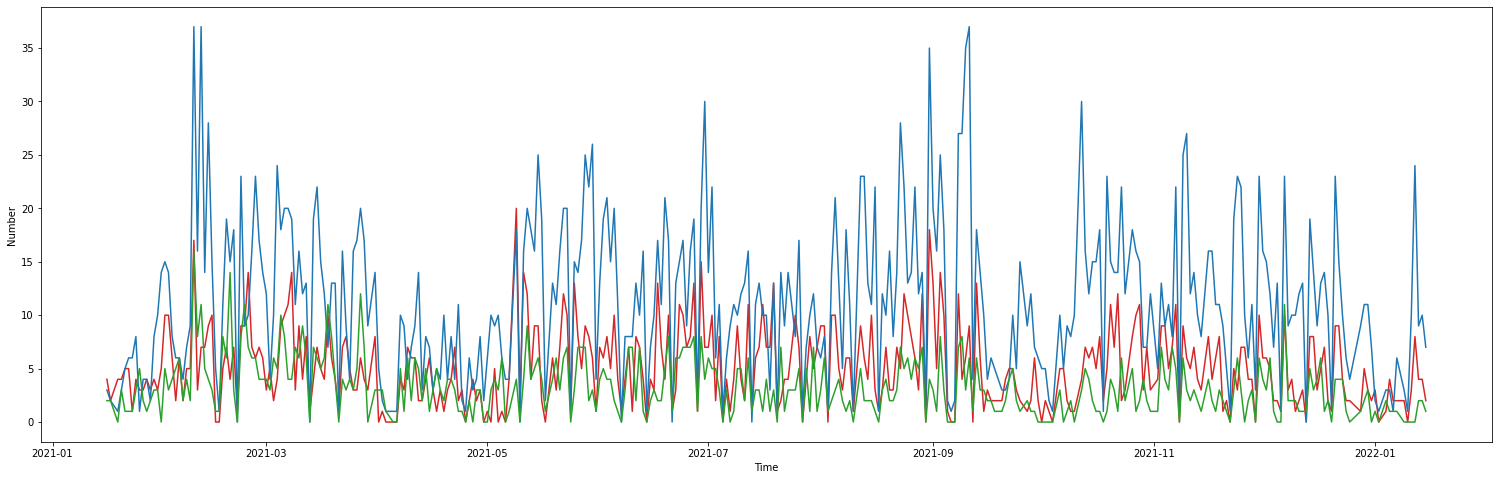

In [7]:
fig, ax = plt.subplots(figsize=(26,8))
ax.plot(nps_d['Date'], nps_d.iloc[:,2], color='tab:red', label='Detractors')
ax.plot(nps_d['Date'], nps_d.iloc[:,4], color='tab:blue', label='Passives')
ax.plot(nps_d['Date'], nps_d.iloc[:,6], color='tab:green', label='Promotors')

ax.set_xlabel('Time')
ax.set_ylabel('Number')

Text(0, 0.5, 'Score')

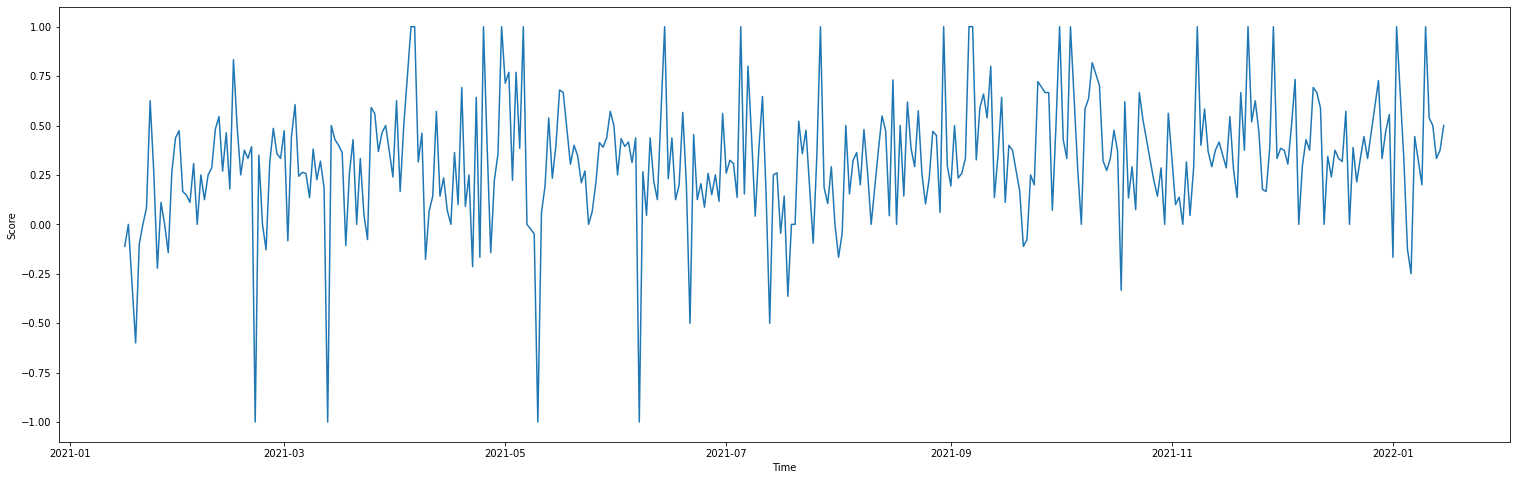

In [8]:
fig, ax = plt.subplots(figsize=(26,8))
ax.plot(nps_d['Date'], nps_d.iloc[:,8])
ax.set_xlabel('Time')
ax.set_ylabel('Score')

Text(0, 0.5, 'Number')

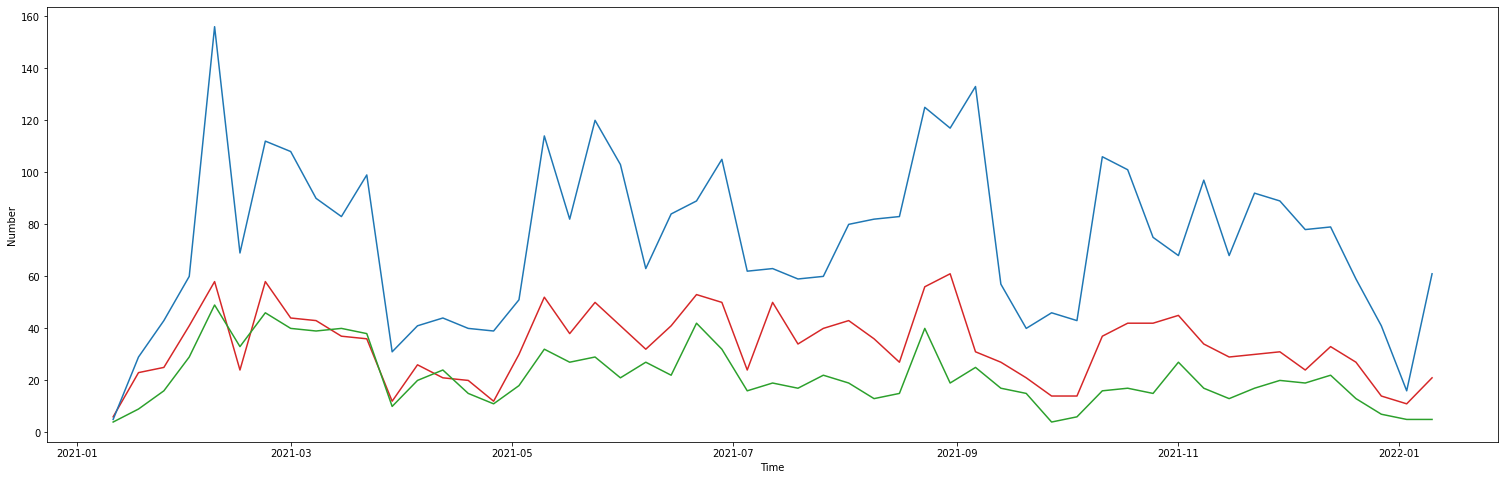

In [9]:
fig, ax = plt.subplots(figsize=(26,8))
ax.plot(nps_s['Date'], nps_s.iloc[:,2], color='tab:red',  label='Detractors')
ax.plot(nps_s['Date'], nps_s.iloc[:,4], color='tab:blue', label='Passives')
ax.plot(nps_s['Date'], nps_s.iloc[:,6], color='tab:green', label='Promotors')

ax.set_xlabel('Time')
ax.set_ylabel('Number')

Text(0, 0.5, 'Score')

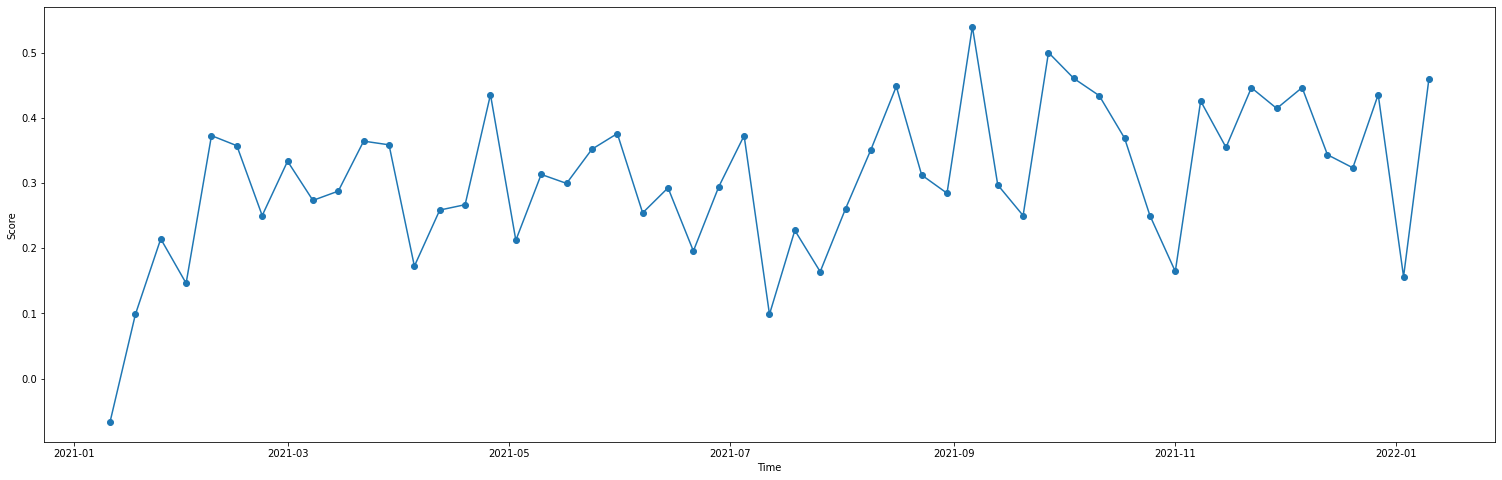

In [10]:
fig, ax = plt.subplots(figsize=(26,8))
ax.plot(nps_s['Date'], nps_s.iloc[:,8], marker='o')
ax.set_xlabel('Time')
ax.set_ylabel('Score')

In [30]:
#confidence intervals
alpha = 0.025
#Daily
nps_d['var'] = (1 - nps_d.iloc[:,8])**2*(nps_d.iloc[:,4]/nps_d.iloc[:,7]) + (0 - nps_d.iloc[:,8])**2*(nps_d.iloc[:,6]/nps_d.iloc[:,7]) + (-1 - nps_d.iloc[:,8])**2*(nps_d.iloc[:,2]/nps_d.iloc[:,7])
nps_d['left_t'] = nps_d['total'].apply(lambda x: st.t.ppf(alpha, x))
nps_d['right_t'] = nps_d['total'].apply(lambda x: st.t.ppf(1 - alpha, x))
nps_d['left_interval'] = nps_d['score'] - abs(nps_d['left_t']*(nps_d['var']**(1/2)/nps_d['total']**(1/2)))
#nps_d['left_interval'] = nps_d['left_interval'].apply(lambda x: -1 if x < -1 else x )
nps_d['right_interval'] = nps_d['score'] + abs(nps_d['right_t']*(nps_d['var']**(1/2)/nps_d['total']**(1/2)))
#nps_d['right_interval'] = nps_d['right_interval'].apply(lambda x: 1 if x > 1 else x)
#weekly
nps_s['var'] = (1 - nps_s.iloc[:,8])**2*(nps_s.iloc[:,4]/nps_s.iloc[:,7]) + (0 - nps_s.iloc[:,8])**2*(nps_s.iloc[:,6]/nps_s.iloc[:,7]) + (-1 - nps_s.iloc[:,8])**2*(nps_s.iloc[:,2]/nps_s.iloc[:,7])
nps_s['left_t'] = nps_s['total'].apply(lambda x: st.t.ppf(alpha, x))
nps_s['right_t'] = nps_s['total'].apply(lambda x: st.t.ppf(1 - alpha, x))
nps_s['left_interval'] = nps_s['score'] - abs(nps_s['left_t']*(nps_s['var']**(1/2)/nps_s['total']**(1/2)))
nps_s['right_interval'] = nps_s['score'] + abs(nps_s['right_t']*(nps_s['var']**(1/2)/nps_s['total']**(1/2)))

Text(0, 0.5, 'Score')

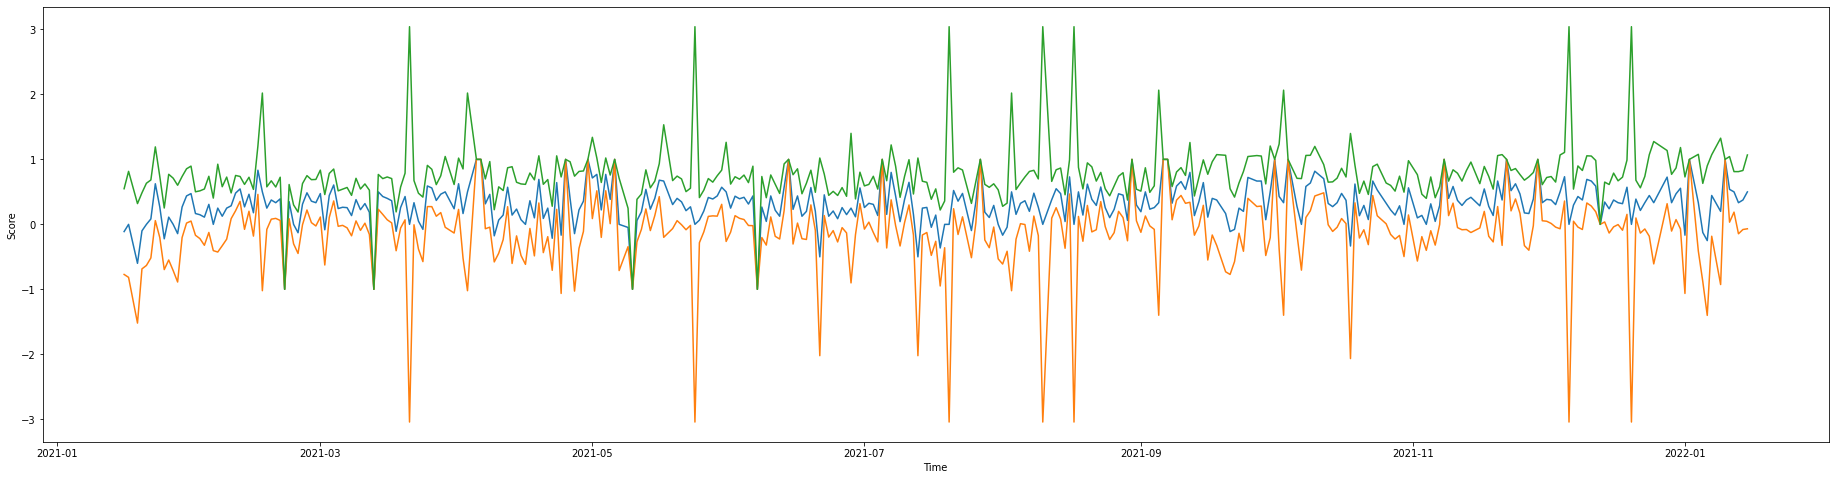

In [35]:
fig, ax = plt.subplots(figsize=(32,8))
ax.plot(nps_d['Date'], nps_d.iloc[:,8])
ax.plot(nps_d['Date'], nps_d['left_interval'])
ax.plot(nps_d['Date'], nps_d['right_interval'])
ax.set_xlabel('Time')
ax.set_ylabel('Score')

Text(0, 0.5, 'Score')

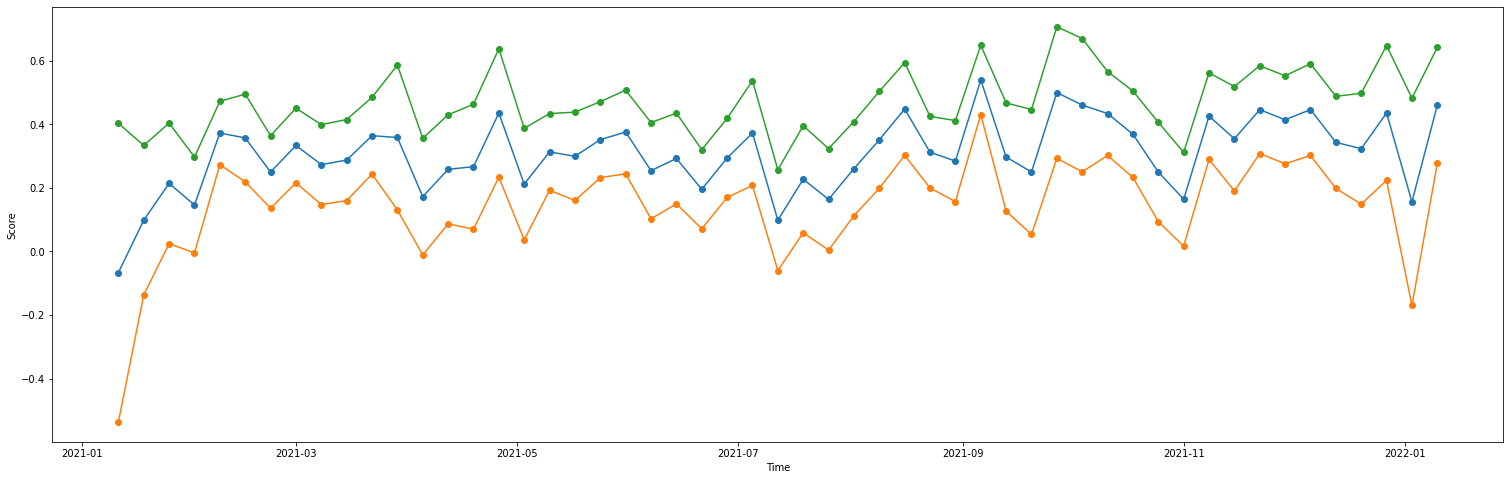

In [13]:
fig, ax = plt.subplots(figsize=(26,8))
ax.plot(nps_s['Date'], nps_s.iloc[:,8], marker='o')
ax.plot(nps_s['Date'], nps_s['left_interval'], marker='o')
ax.plot(nps_s['Date'], nps_s['right_interval'], marker='o')
ax.set_xlabel('Time')
ax.set_ylabel('Score')

In [14]:
#Regression
X = nps_s['Date'].index.values.reshape(-1,1)
Yr = nps_s['right_interval'].values.astype('float64').reshape(-1,1)*100
Yl = nps_s['left_interval'].values.astype('float64').reshape(-1,1)*100
Yc = nps_s['score'].values.astype('float64').reshape(-1,1)*100

reg_s_r = LinearRegression().fit(X,Yr)
reg_s_l = LinearRegression().fit(X,Yl)
reg_s_c = LinearRegression().fit(X,Yc)

In [15]:
print(reg_s_r.score(X,Yr), reg_s_l.score(X,Yl), reg_s_c.score(X,Yc))

0.21207784623058645 0.1240800488813788 0.18977832096507063


In [16]:
print(reg_s_r.intercept_,reg_s_r.coef_)
print(reg_s_l.intercept_,reg_s_l.coef_)
print(reg_s_c.intercept_,reg_s_c.coef_)

[39.09274744] [[0.30762373]]
[5.41870438] [[0.34576975]]
[22.25572591] [[0.32669674]]


In [17]:
x_pred = np.arange(0,65).reshape(-1,1)

Text(0, 0.5, 'Score')

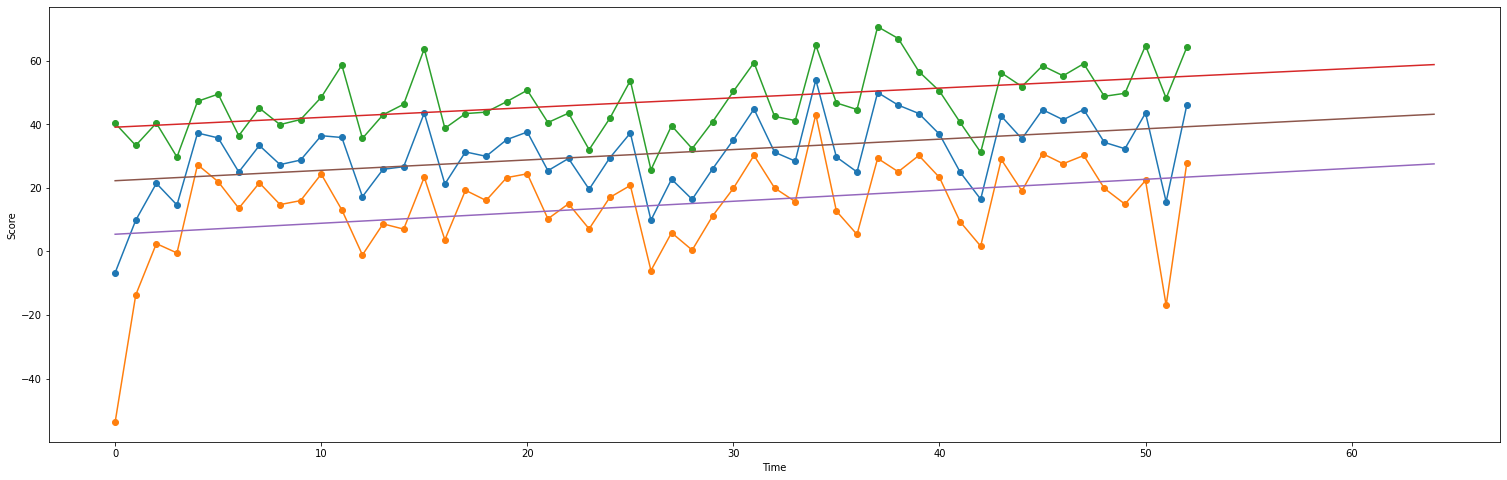

In [18]:
fig, ax = plt.subplots(figsize=(26,8))
ax.plot(nps_s['Date'].index, nps_s.iloc[:,8]*100, marker='o')
ax.plot(nps_s['Date'].index, nps_s['left_interval']*100, marker='o')
ax.plot(nps_s['Date'].index, nps_s['right_interval']*100, marker='o')
ax.plot(x_pred, reg_s_r.predict(x_pred))
ax.plot(x_pred, reg_s_l.predict(x_pred))
ax.plot(x_pred, reg_s_c.predict(x_pred))
ax.set_xlabel('Time')
ax.set_ylabel('Score')

In [19]:
reg_s_r.predict([[64]])

array([[58.78066646]])

In [20]:
reg_s_l.predict([[64]])

array([[27.54796818]])

In [21]:
reg_s_c.predict([[64]])

array([[43.16431732]])

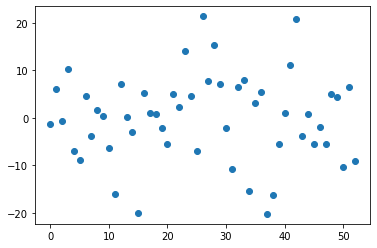

In [38]:
fig, ax = plt.subplots()
ax.scatter(X, reg_s_r.predict(X) - Yr)

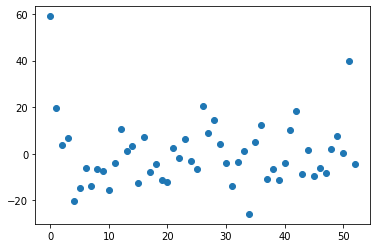

In [39]:
fig, ax = plt.subplots()
ax.scatter(X, reg_s_l.predict(X) - Yl)

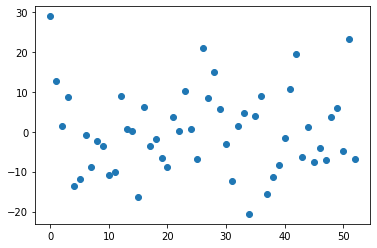

In [40]:
fig, ax = plt.subplots()
ax.scatter(X, reg_s_c.predict(X) - Yc)

Pruebas de hipotesis sobre las pendientes 